# Introduction 

In the following notebook, I will creating a time series forecast aiming to predict electricity load in Spain. 

* Raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)
* Cleaned data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)
* Training and test data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/03_Processed_Data)

**Read in libraries for notebook**

In [30]:
import numpy as np
import pandas as pd
from IPython.display import Image

import matplotlib.pyplot as plt
import warnings

**Set notebook preferences**

In [31]:
#Set preferences for pandas 
pd.set_option("display.max_rows", 101)

#Set style for visualizations
plt.style.use('Solarize_Light2')

#Font dictionary for plot titles and labels
font_title = {'fontsize' : 24, 
              'style':'italic',
              'fontweight' : 'semibold',
             'fontname':'Gill Sans MT'}

font_label = {'fontsize' : 16, 
              'style':'italic',
              'fontweight' : 'semibold',
             'fontname':'Gill Sans MT'}

#Set path to capture visuals from EDA
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\Exploratory_Data_Analysis\Load'

#Surpress warnings
warnings.filterwarnings('ignore')

**Read in data**

In [32]:
#Set path to raw data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather/Data/03_Processed_Data'

#Read in Bilbao training and test data
train = pd.read_csv(path + '/2020_0517_load_train.csv', parse_dates=['date_time'], index_col='date_time')
test = pd.read_csv(path + '/2020_0517_load_test.csv', parse_dates=['date_time'], index_col='date_time')

**Data preview**

*Training data*

In [33]:
#Print data shape and preview head
print('Training data shape:',train.shape)
display(train.head())

Training data shape: (28038, 4)


,load,load_forecast,load_differenced1,load_differenced2
date_time,,,,
2015-01-02 01:00:00,24935.0,25397.0,-2135.0,-1132.0
2015-01-02 02:00:00,23214.0,23640.0,-1721.0,-73.0
2015-01-02 03:00:00,22540.0,22638.0,-674.0,774.0
2015-01-02 04:00:00,22096.0,22238.0,-444.0,578.0
2015-01-02 05:00:00,22066.0,22299.0,-30.0,329.0


*Test Data*

In [34]:
#Print data shape and preview head
print('Test data shape:',test.shape)
display(train.head())

Test data shape: (7009, 4)


,load,load_forecast,load_differenced1,load_differenced2
date_time,,,,
2015-01-02 01:00:00,24935.0,25397.0,-2135.0,-1132.0
2015-01-02 02:00:00,23214.0,23640.0,-1721.0,-73.0
2015-01-02 03:00:00,22540.0,22638.0,-674.0,774.0
2015-01-02 04:00:00,22096.0,22238.0,-444.0,578.0
2015-01-02 05:00:00,22066.0,22299.0,-30.0,329.0


# Raw and Deseasoned Plots

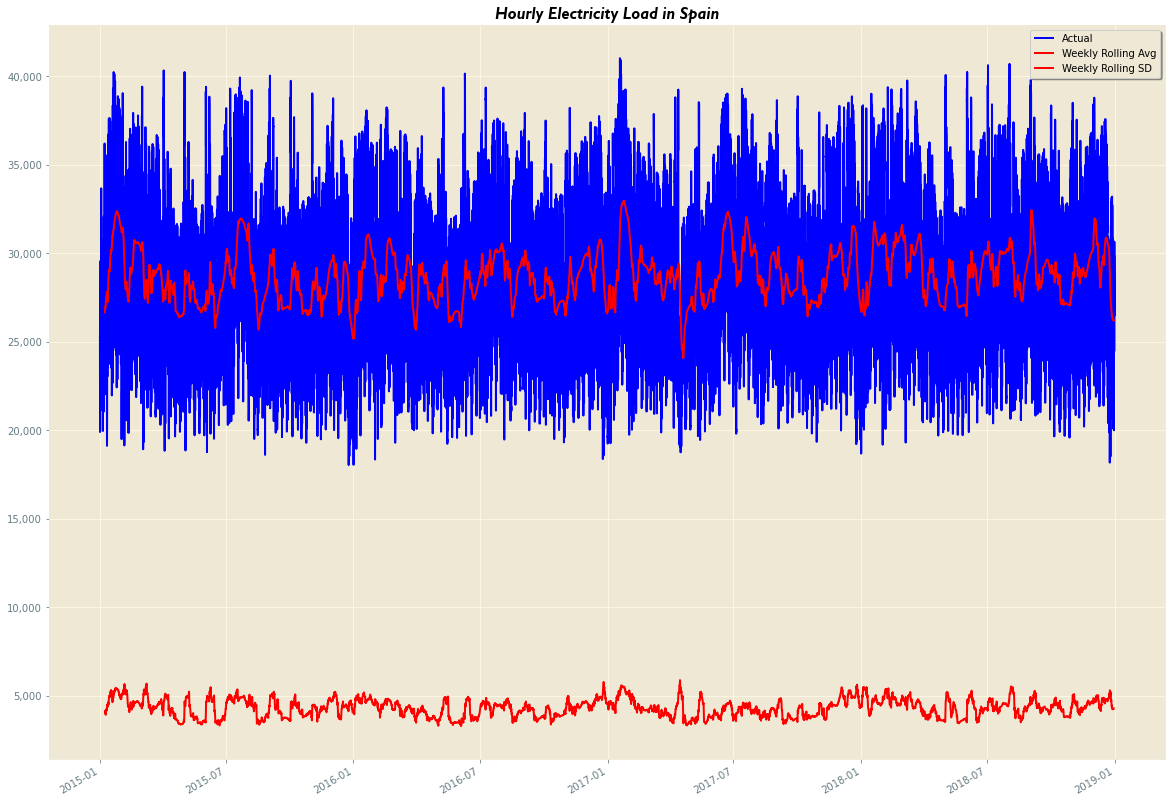

In [35]:
Image(filename = eda_path + "/Hourly_Load.png", width=900, height=700,unconfined=True)

# Include startionary data HERE!!!!!!!!!

In [36]:
#PNG of stationary data

# Quick EDA of Training and Test data 

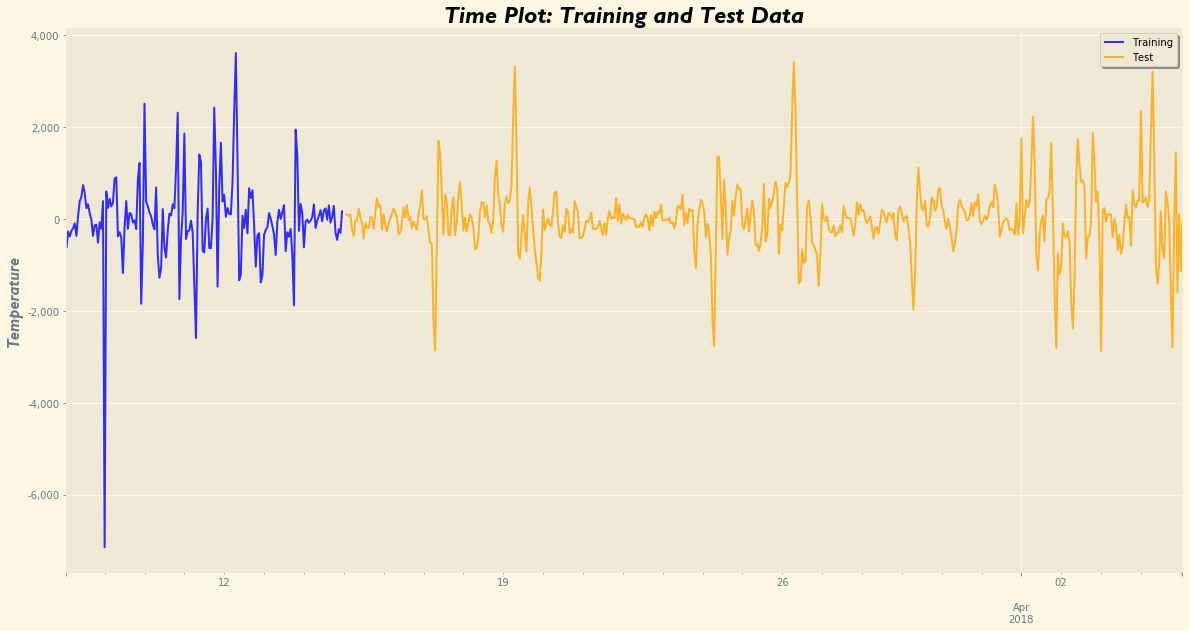

In [37]:
#Import timeseries_plot
from TimeseriesPlotter import timeseries_plot

#Set figure
f, ax = plt.subplots(figsize = (20,10))

#Plot training and test data
timeseries_plot(train.load_differenced2[-24*7:-1], color = 'blue', ax=ax, label = 'Training',alpha = .8)
timeseries_plot(test.load_differenced2[0:24*7*3], color = 'orange', ax = ax, legend = True,alpha = .8,label = 'Test', 
                title='Time Plot: Training and Test Data', title_dict=font_title,
               ylabel='Temperature', label_dict=font_label)

###Set plot aesthetics###
#Axes
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: '{:,}'.format(int(x))))

# Forecasting 

## Base model: Single Exponential Smoothing

**Fit Naive Single Exponential Smoothing Model

In [60]:
#Import Exponential Smoothing model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Fit model to training data
es_model = ExponentialSmoothing(train['load_differenced2'].values).fit()

#Create forecasts
predictions = es_model.forecast(len(test))

**Score model and visualize fit

In [61]:
#Import TimeSeriesStats
from TimeSeriesStats import model_performance

#Evaluate model's performance and print results
results = model_performance(predictions, test['load_differenced2'])
results

{'MAE': 484.7213582536738,
 'MAPE': 1.0,
 'MSE': 765918.1332572406,
 'RMSE': 875.1674886884457}

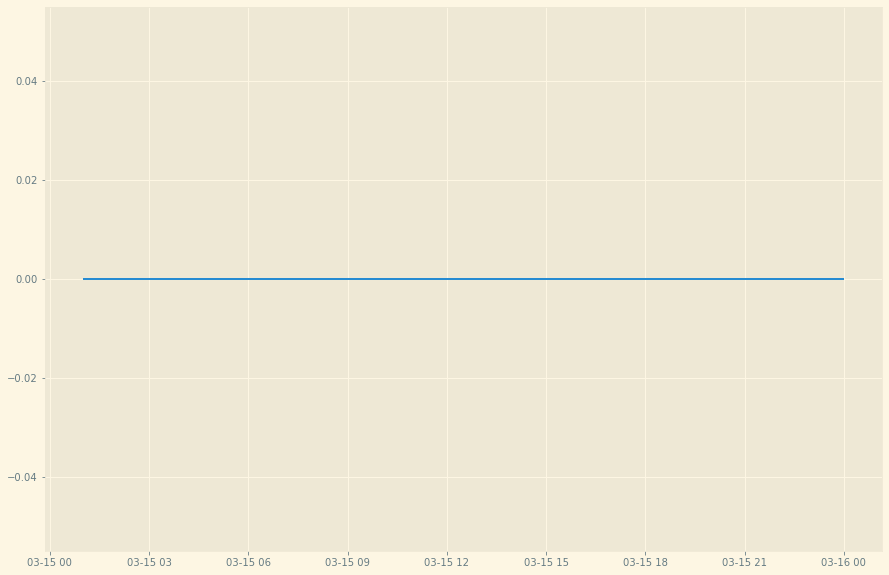

In [62]:
#Create figure
f, ax = plt.subplots(figsize = (15,10))

plt.plot(test.index[:24], predictions[:24], )